[View in Colaboratory](https://colab.research.google.com/github/karanj1/Machine-Learning/blob/master/IMS_CSCF_CPU_Load_Predictive2.ipynb)

Implementaion inspired by:

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://www.kaggle.com/karanj05/home-credit




## Environment preparations

#### import and install libraries

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor  #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# File system manangement
import os
import glob

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# to hide output of this cell
%%capture
# Install tools needed for visualization
!apt-get install python3-pydot graphviz
!pip3 install pydot_ng
!pip3 install graphviz
#!pip install -I pydot==1.2.4

In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot_ng as pydot
from subprocess import check_call

#### upload data files

In [2]:
from google.colab import files

uploaded = files.upload() # then browse, select the files. It's then uploaded

Saving Customer1.csv to Customer1.csv
Saving Customer2.csv to Customer2.csv
Saving Customer3.csv to Customer3.csv
Saving Customer4.csv to Customer4.csv
Saving Customer5.csv to Customer5.csv
Saving Customer6.csv to Customer6.csv
Saving Customer7.csv to Customer7.csv


In [3]:
!ls  # to see uploaded files
cdf1 = pd.read_csv("Customer1.csv")  #customer data frame 1
cdf2 = pd.read_csv("Customer2.csv")  #customer data frame 2
cdf3 = pd.read_csv("Customer3.csv")  #customer data frame 3
cdf4 = pd.read_csv("Customer4.csv")  #customer data frame 4
cdf5 = pd.read_csv("Customer5.csv")  #customer data frame 5
cdf6 = pd.read_csv("Customer6.csv")  #customer data frame 6
cdf7 = pd.read_csv("Customer7.csv")  #customer data frame 7

Customer1.csv  Customer3.csv  Customer5.csv  Customer7.csv
Customer2.csv  Customer4.csv  Customer6.csv  sample_data


#### Import multiple csv files into pandas and concatenate into one DataFrame


In [57]:
path =r'/content' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
cdf = pd.concat(list_)

cdf.describe()

,Unnamed: 0,CPU_Load,Answered_Calls,De_Registrations,Total_Users,Initial_Registrations,Call_Attempts,Mean_Holding_Time,Re_Registrations,Total_SMS
count,1666.000000,1666.000000,1.666000e+03,1666.000000,1.666000e+03,1666.000000,1666.000000,1.666000e+03,1666.000000,1666.000000
mean,185.581032,234.054570,4.467385e+05,30335.727491,2.455623e+11,42161.733493,47247.713685,7.845117e+07,89520.410564,3297.440576
std,156.727808,168.816338,2.399895e+05,44545.621173,2.936649e+11,47060.323467,44523.248768,6.394594e+07,44575.571314,6347.862748
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,67.000000,91.642500,2.955613e+05,549.250000,2.850754e+10,1487.000000,4789.000000,3.921958e+07,52712.500000,0.000000
50%,144.500000,204.109215,3.410358e+05,7072.500000,1.130000e+11,28734.000000,36568.500000,5.141471e+07,79574.000000,1.000000
75%,246.750000,330.106573,5.908098e+05,41930.500000,3.447500e+11,63381.500000,84387.500000,9.284274e+07,117299.000000,3182.000000
max,620.000000,954.278448,1.964218e+06,169861.000000,1.090000e+12,189344.000000,181200.000000,4.115027e+08,203663.000000,41229.000000


## Data Analysis

In [60]:
# Check size of all the given data-sets
print('Size of Customer 1 data', cdf1.shape)

cdf1.head(10)

Size of Customer 1 data (621, 9)


,Unnamed: 0,Answered_Calls,De_Registrations,Total_Users,Initial_Registrations,Call_Attempts,Mean_Holding_Time,Re_Registrations,Total_SMS
0,0,277454.9874,975,23462366961,1075,5356,139470585.6,54991,0
1,1,273477.7234,929,23133905629,953,4564,137035653.3,54678,0
2,2,277761.0052,779,22846003639,912,3602,155611501.2,52863,0
3,3,257473.9019,647,22546587886,764,3007,153392778.2,51535,0
4,4,247683.8841,542,22312147910,710,2257,189894056.5,51519,0
5,5,252995.5583,425,22100917620,619,1863,155374072.6,50326,0
6,6,239755.3418,432,21913299910,613,1604,152459209.5,48588,0
7,7,235834.0543,394,21758033910,597,1332,224319339.5,48495,0
8,8,234177.2779,334,21624986482,491,1127,144916314.0,49388,0
9,9,214268.1929,273,21532147363,507,1121,183158966.5,46978,0


,Unnamed: 0,CPU_Load,Answered_Calls,De_Registrations,Total_Users,Initial_Registrations,Call_Attempts,Mean_Holding_Time,Re_Registrations,Total_SMS
count,621.000000,621.000000,621.000000,621.000000,6.210000e+02,621.000000,621.000000,6.210000e+02,621.000000,621.000000
mean,310.000000,127.260059,298626.621560,490.801932,2.694401e+10,1230.987118,24479.869565,6.566715e+07,71435.486312,0.415459
std,179.411538,73.720243,41799.995448,249.510219,3.439876e+09,471.489883,21093.244769,4.440633e+07,15752.778158,1.622827
min,0.000000,32.286667,113191.838400,95.000000,1.506701e+10,312.000000,439.000000,1.665210e+07,30155.000000,0.000000
25%,155.000000,47.986667,265313.052100,293.000000,2.397585e+10,840.000000,2665.000000,4.194213e+07,54122.000000,0.000000
50%,310.000000,126.170000,317543.776600,485.000000,2.779213e+10,1418.000000,21794.000000,4.796873e+07,76791.000000,0.000000
75%,465.000000,196.600000,329986.483600,618.000000,2.945137e+10,1527.000000,43575.000000,6.703282e+07,85636.000000,0.000000
max,620.000000,245.806667,350401.588600,1252.000000,3.318181e+10,2255.000000,62230.000000,2.627291e+08,94298.000000,16.000000


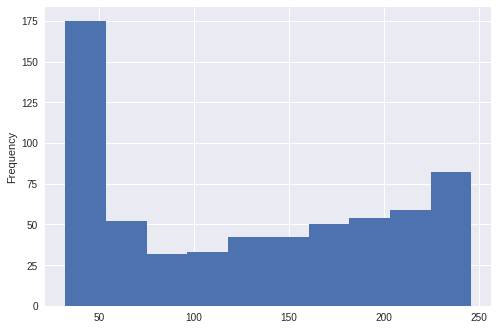

In [5]:
cdf1['CPU_Load'].plot.hist()

cdf1.describe()

In [6]:
# Function to check/calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        #print(mis_val[:10])
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        #print(mis_val_table[:20])
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        #print(mis_val_table_ren_columns[:20])
        
        # Sort the table by percentage of missing descending
        #iloc[:,1]!=0;  elements of 1st colomn(i.e. % of Total Values), which are not zero
        #sort_values ; sort the elements of df in decending order according to elements of 1st coloumn
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        #print(mis_val_table_ren_columns[:20])
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
    
# Missing values statistics
missing_values = missing_values_table(cdf1)
missing_values.head(20)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


###Anomalies
Lookout for anomalies within data. It can be due to mistyped numbers, error in measuring equipmentrs or they can be valid but extreme measurements (super-outliers). One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method.

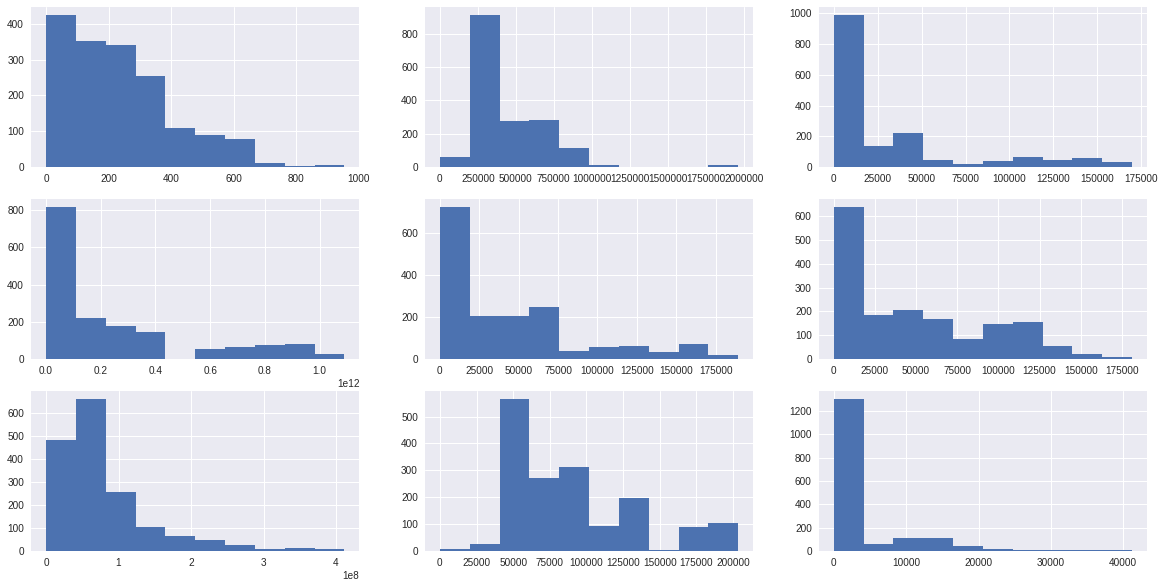

In [64]:
#@title Default title text
#sns.pairplot(cdf1)
plt.figure(figsize=(20, 10))
for i in range(1, len(list(cdf))):  # starting from column 1, as column1 is not useful
    axs = plt.subplot(3, 3, i)
    axs.hist(cdf[cdf.columns[i]])

###Correlations

Now that we have dealt with the categorical variables and the outliers/anomaly, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

In [65]:
correlations = cdf.corr()['CPU_Load'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(6))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 Total_Users              0.625115
Answered_Calls           0.661360
De_Registrations         0.746698
Initial_Registrations    0.781732
Call_Attempts            0.849244
CPU_Load                 1.000000
Name: CPU_Load, dtype: float64

Most Negative Correlations:
 Unnamed: 0          -0.302682
Mean_Holding_Time    0.064762
Total_SMS            0.459972
Re_Registrations     0.574030
Total_Users          0.625115
Name: CPU_Load, dtype: float64


To visualize the effect of the Call_Attempts on the CPU_Load, we will next make a kernel density estimation plot (KDE) colored by the value of the CPU_Load. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

##Features and Targets and Convert Data to Arrays

Now, we need to separate the data into the features and targets. The target, also known as the label, is the value we want to predict, in this case the actual max temperature and the features are all the columns the model uses to make a prediction. We will also convert the Pandas dataframes to Numpy arrays because that is the way the algorithm works. (I save the column headers, which are the names of the features, to a list to use for later visualization).

In [0]:

# Labels are the values we want to predict
labels = np.array(cdf['CPU_Load'])
# Remove the labels from the features
# axis 1 refers to the columns
cdf= cdf.drop('CPU_Load', axis = 1)
# Saving feature names for later use
cdf_list = list(cdf.columns)  #feature_list
# Convert to numpy array
cdf_arr = np.array(cdf)

###Training and Testing Sets

In [0]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(cdf_arr, labels, test_size = 0.25, random_state = 42)

In [68]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1249, 9)
Training Labels Shape: (1249,)
Testing Features Shape: (417, 9)
Testing Labels Shape: (417,)


##Train Model
After all the work of data preparation, creating and training the model is pretty simple using Scikit-learn. 

First we create baseline model using** Linear regression**.

But our ultimate aim is to create a better model than linear regression one. We ll try with **Random forests** and see if it perfoms better than linear regression model.

### Linear Regression Model
-- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

-- https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

-- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too.

In [75]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_features, train_labels)

# Make predictions using the testing set
linear_regr_pred = regr.predict(test_features)

print(linear_regr_pred[-10:], test_labels[-10:])
print()
print(linear_regr_pred.shape, test_labels.shape)
print()


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("\nMean squared error: %.2f"
      % mean_squared_error(test_labels, linear_regr_pred))
# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(test_labels, linear_regr_pred))

# This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions.  #using inbuilt score
print('\nR² score: %.2f' % regr.score(test_features, test_labels))
#lm.score(X,y)


errors_linear = abs(linear_regr_pred - test_labels)

# Display the performance metrics
print('\nMean Absolute Error:', round(np.mean(errors_linear), 2), 'degrees.')
mape_linear = np.mean(100 * (errors_linear / test_labels))
accuracy_linear = 100 - mape
print('\nAccuracy:', round(accuracy_linear, 2), '%.')

[216.85543186 238.96102232 252.72210491 439.04594598 388.34894577
 508.68574171 234.34268612 660.70942615 394.63176048 265.81177616] [215.4766667 237.3233333 205.263367  405.650704  414.154295  560.777628
 233.211581  927.8332927 423.963337  287.3110593]

(417,) (417,)

Coefficients: 
 [-1.95601673e-02  1.72409992e-04  1.58032752e-03 -6.23594048e-11
 -1.02709299e-03  2.29897181e-03 -8.59205676e-09  1.33287242e-03
  3.68482654e-03]

Mean squared error: 933.10

Variance score: 0.97

R² score: 0.97

Mean Absolute Error: 17.98 degrees.

Accuracy: -inf %.


So as we can see above for linear Regression:

MSE : 24.59

R² score OR Variance score : 1.00

Mean Absolute Error: 4.05 degrees.

Accuracy: 94.72 %.

### Random Forest Model
We import the random forest regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. (Again setting the random state for reproducible results). This entire process is only 3 lines in scikit-learn!

In [0]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [94]:
predictions_rf_train = rf.predict(train_features)
mse_rf_train = mean_squared_error(train_labels, predictions_rf_train)
print (mse_rf_train)
print()
rmse_rf_train = np.sqrt(mse_rf_train)
print (rmse_rf_train)
print()

19.57685747316626

4.4245742702734985



####Make Predictions on the Test Set
Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. We are interested in how far away our average prediction is from the actual value so we take the absolute value (as we also did when establishing the baseline).

Making predictions with out model is another 1-line command in Skicit-learn.

In [79]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)

# Calculate the absolute errors
errors_rf = abs(predictions_rf - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_rf), 2), 'degrees.')

Mean Absolute Error: 5.59 degrees.


In [82]:
# The mean squared error
print("\nMean squared error: %.2f"
      % mean_squared_error(test_labels, predictions_rf))

print("\nRoot Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(test_labels, predictions_rf)))

# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(test_labels, predictions_rf))

# This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions.  #using inbuilt score
print('\nR² score: %.2f' % rf.score(test_features, test_labels))
#lm.score(X,y)


Mean squared error: 198.26

Root Mean squared error: 14.08

Variance score: 0.99

R² score: 0.99


To put our predictions in perspective, we can calculate an **accuracy** using the mean average percentage error subtracted from 100 %.

In [81]:
# Calculate mean absolute percentage error (MAPE)
mape_rf = 100 * (errors_rf / test_labels)

# Calculate and display accuracy
accuracy_rf = 100 - np.mean(mape_rf)
print('Accuracy:', round(accuracy_rf, 2), '%.')

Accuracy: -inf %.


So as we can see above for **Random Forest**:

MSE : 4.73

R² score OR Variance score : 1.00

Mean Absolute Error: 1.62 degrees.

Accuracy: 98.47 %.

So compared to Linear regression, **Random forest is way better** in terms of Performance Matrix

**Random Forest Wins :)**

##Improve Model if Necessary
In the usual machine learning workflow, this would be when start hyperparameter tuning. This is a complicated phrase that means “adjust the settings to improve performance” (The settings are known as hyperparameters to distinguish them from model parameters learned during training). The most common way to do this is simply make a bunch of models with different settings, evaluate them all on the same validation set, and see which one does best. Of course, this would be a tedious process to do by hand, and there are automated methods to do this process in Skicit-learn. Hyperparameter tuning is often more engineering than theory-based, and I would encourage anyone interested to check out the documentation and start playing around! An accuracy of 94% is satisfactory for this problem, but keep in mind that the first model built will almost never be the model that makes it to production.

###Interpret Model and Report Results
At this point, we know our model is good, but it’s pretty much a black box. We feed in some Numpy arrays for training, ask it to make a prediction, evaluate the predictions, and see that they are reasonable. The question is: how does this model arrive at the values? There are two approaches to get under the hood of the random forest: first, we can look at a single tree in the forest, and second, we can look at the feature importances of our explanatory variables.

####Visualizing a Single Decision Tree
One of the coolest parts of the Random Forest implementation in Skicit-learn is we can actually examine any of the trees in the forest. We will select one tree, and save the whole tree as an image.

The following code takes one tree from the forest and saves it as an image.

In [84]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = cdf_list, rounded = True, precision = 1)

check_call(['dot','-Tpng','tree.dot','-o','tree.png'])    #https://stackoverflow.com/a/45384587/4811148

# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
#graph.write_png('tree.png')


0

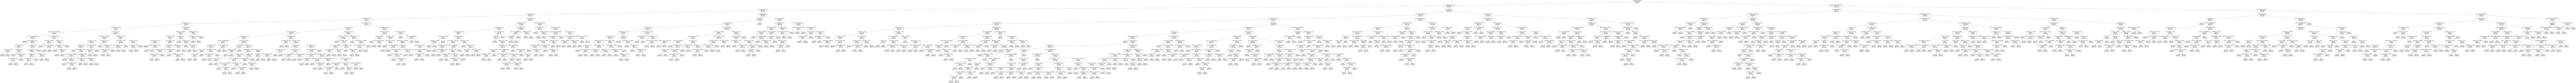

In [85]:
#from IPython.display import Image  #https://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook/32370538
#from IPython.core.display import HTML 
#Image("tree.png", unconfined=True)

from IPython.core.display import Image, display
display(Image("tree.png", width=1900, unconfined=True))

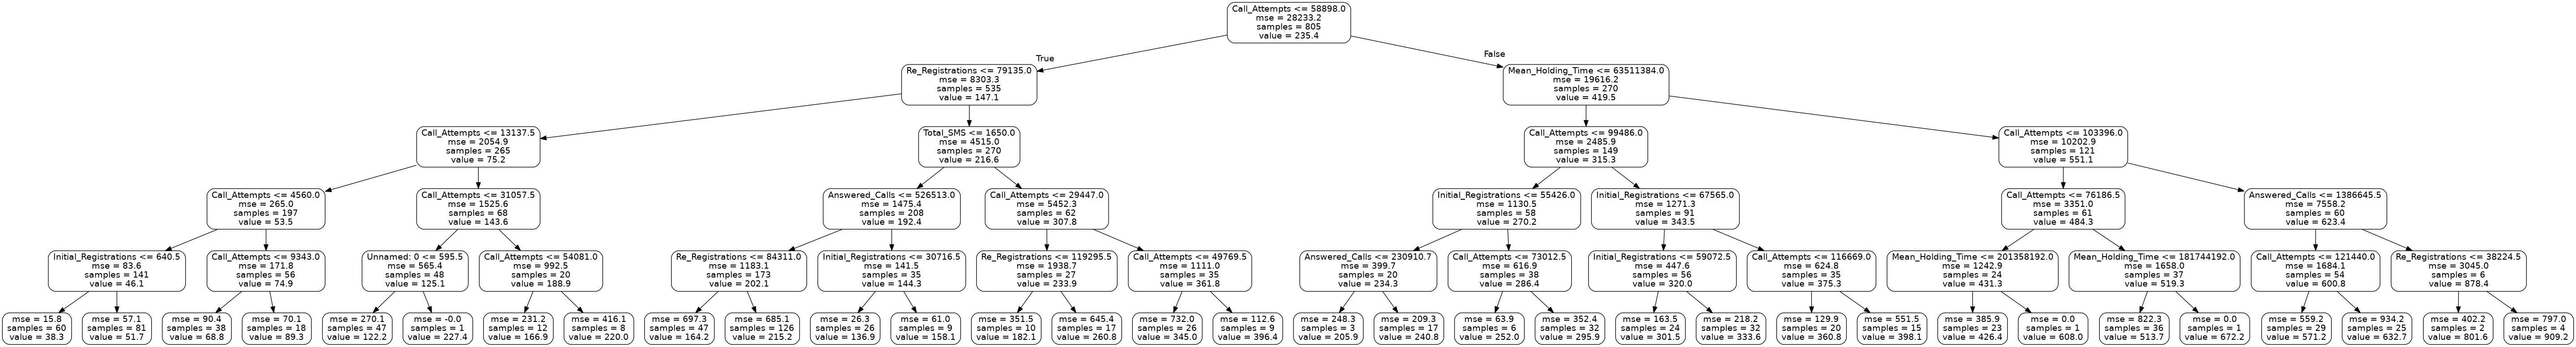

An interesting observation is that in the root node, there are only 294 samples despite there being 465 training data points.
 This is because each tree in the forest is trained on a random subset of the data points with replacement (called bagging, short for bootstrap aggregating).
 (We can turn off the sampling with replacement and use all the data points by setting bootstrap = False when making the forest).
 Random sampling of data points, combined with random sampling of a subset of the features at each node of the tree, is why the model is called a ‘random’ forest.

  Furthermore, notice that in our tree, there are 2 variables(Call_Attempts and Re_Registration) algorithm actually used frequently to make a prediction!
 According to this particular decision tree, the rest of the features are not much important for making a prediction.
 Visualizing the tree has increased our domain knowledge of the problem, and we now know what data to look for if we are asked to make a prediction!


In [87]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 5, random_state=42) #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = cdf_list, rounded = True, precision = 1)

check_call(['dot','-Tpng','small_tree.dot','-o','small_tree.png'])    #https://stackoverflow.com/a/45384587/4811148

#Image("small_tree.png")
display(Image("small_tree.png", height=400, width=1600, unconfined=True))

#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

#graph.write_png('small_tree.png')

print ("An interesting observation is that in the root node, there are only 805 samples despite there being 1661 training data points.\
\n This is because each tree in the forest is trained on a random subset of the data points with replacement (called bagging, short for bootstrap aggregating).\
\n (We can turn off the sampling with replacement and use all the data points by setting bootstrap = False when making the forest).\
\n Random sampling of data points, combined with random sampling of a subset of the features at each node of the tree, is why the model is called a ‘random’ forest.\
\n\n  Furthermore, notice that in our tree, there are 2 variables(Call_Attempts and Re_Registration) algorithm actually used frequently to make a prediction!\
\n According to this particular decision tree, the rest of the features are not much important for making a prediction.\
\n Visualizing the tree has increased our domain knowledge of the problem, and we now know what data to look for if we are asked to make a prediction!")

###Variable Importances
In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. The actual calculation of the importance is beyond the scope of this post, but we can use the numbers to make relative comparisons between variables.

The code here takes advantage of a number of tricks in the Python language, namely list comprehensive, zip, sorting, and argument unpacking. It’s not that important to understand these at the moment, but if you want to become skilled at Python, these are tools you should have in your arsenal!

In [88]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(cdf_arr, round(importance, 2)) for cdf_arr, importance in zip(cdf_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Call_Attempts        Importance: 0.66
Variable: Mean_Holding_Time    Importance: 0.15
Variable: Re_Registrations     Importance: 0.13
Variable: Total_SMS            Importance: 0.02
Variable: Answered_Calls       Importance: 0.01
Variable: De_Registrations     Importance: 0.01
Variable: Initial_Registrations Importance: 0.01
Variable: Unnamed: 0           Importance: 0.0
Variable: Total_Users          Importance: 0.0


At the top of the list is Call_Attempts. This tells us the best predictor of the CPU_Load.

In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method. Let’s quickly make a random forest with only the five most important variables, the Call_Attempts, Mean_Holding_Time, Re_Registration, Total_SMS and the Answered_Calls and see how the performance compares. (top 3 features from [correlation](https://colab.research.google.com/drive/1onL7xzsPfmJM8p_8GzJquYAlhO82jq50?authuser=1#scrollTo=xGraw8V0-QY0)) cell.

In [91]:
# New random forest with only the 3 most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the 3 most important features
important_indices = [cdf_list.index('Call_Attempts'), cdf_list.index('Mean_Holding_Time'), cdf_list.index('Re_Registrations'), cdf_list.index('Total_SMS'), cdf_list.index('Answered_Calls')]
print("important_indices: ",important_indices)
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions_rf_improved = rf_most_important.predict(test_important)
errors_rf_improved = abs(predictions_rf_improved - test_labels)

# The mean squared error
print("\nMean squared error: %.2f"
      % mean_squared_error(test_labels, predictions_rf_improved))

print("\nRoot Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(test_labels, predictions_rf_improved)))

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors_rf_improved), 2), 'degrees.')
mape_rf_improved = np.mean(100 * (errors_rf_improved / test_labels))
accuracy_rf_improved = 100 - mape_rf_improved
print('Accuracy:', round(accuracy_rf_improved, 2), '%.')

important_indices:  [5, 6, 7, 8, 1]

Mean squared error: 208.55

Root Mean squared error: 14.44
Mean Absolute Error: 5.87 degrees.
Accuracy: -inf %.


This tells us that we actually do not need all the data we collected to make accurate predictions! If we were to continue using this model, we could only collect the three variables and achieve nearly the same performance. In a production setting, we would need to weigh the decrease in accuracy versus the extra time required to obtain more information. Knowing how to find the right balance between performance and cost is an essential skill for a machine learning engineer and will ultimately depend on the problem!

## For Fun: Light GBM

https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/sklearn_example.py

In [49]:
!pip3 install lightgbm

    100% |████████████████████████████████| 1.1MB 9.1MB/s 


In [92]:
## lgbmregressior
# https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
# https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/sklearn_example.py

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV



print('Start training...')
# train
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=500)
gbm.fit(train_features, train_labels,
        eval_set=[(test_features, test_labels)],
        eval_metric='l1',
        early_stopping_rounds=5)

print('Start predicting...')
# predict
lgbm_pred = gbm.predict(test_features, num_iteration=gbm.best_iteration_)
# eval
print('The rmse of prediction is:', mean_squared_error(test_labels, lgbm_pred) ** 0.5)

# feature importances
print('Feature importances:', list(gbm.feature_importances_))


lgbm_errors = abs(lgbm_pred - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (lgbm_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Start training...
[1]	valid_0's l2: 25071.3	valid_0's l1: 126.048
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 22717.6	valid_0's l1: 119.89
[3]	valid_0's l2: 20593.4	valid_0's l1: 114.058
[4]	valid_0's l2: 18672.5	valid_0's l1: 108.484
[5]	valid_0's l2: 16936.6	valid_0's l1: 103.198
[6]	valid_0's l2: 15384.7	valid_0's l1: 98.2221
[7]	valid_0's l2: 13968.7	valid_0's l1: 93.4582
[8]	valid_0's l2: 12700.8	valid_0's l1: 88.9542
[9]	valid_0's l2: 11552.8	valid_0's l1: 84.6848
[10]	valid_0's l2: 10507.5	valid_0's l1: 80.6107
[11]	valid_0's l2: 9573.61	valid_0's l1: 76.8103
[12]	valid_0's l2: 8724.19	valid_0's l1: 73.1407
[13]	valid_0's l2: 7953.47	valid_0's l1: 69.6503
[14]	valid_0's l2: 7256.2	valid_0's l1: 66.3914
[15]	valid_0's l2: 6622.55	valid_0's l1: 63.2524
[16]	valid_0's l2: 6044.26	valid_0's l1: 60.2381
[17]	valid_0's l2: 5525.88	valid_0's l1: 57.4279
[18]	valid_0's l2: 5048.41	valid_0's l1: 54.7213
[19]	valid_0's l2: 4621.86	valid_0's l1: 52.1834
[

**Light GBM**:

The rmse of prediction is: 2.4154978415210264

Mean Absolute Error: 1.62 degrees.

Accuracy: 98.1 %.